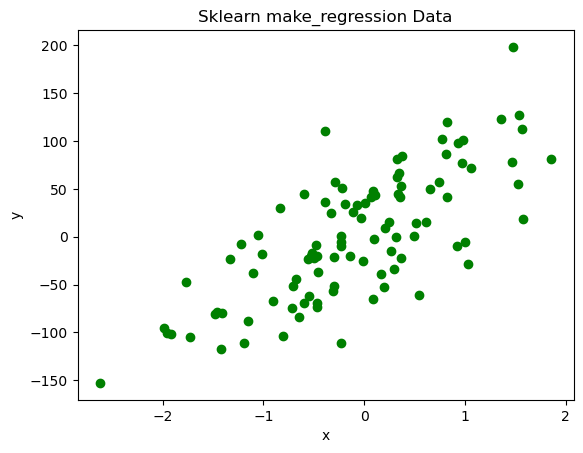

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 회귀용 예시 데이터 생성
x, y = make_regression(n_samples=100, n_features=1, noise=50, random_state=42)


plt.scatter(x, y, color='green')
plt.title("Sklearn make_regression Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [2]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=1, learning_rate='constant', eta0=0.01, warm_start=True, random_state=42)
# model = SGDRegressor(max_iter=1, learning_rate='constant', eta0=0.01, warm_start=True, random_state=42)

# SGDRegressor 모델 파라미터 설명:
# ------------------------------------------------------------------------------------------------------

# max_iter=1
# - 역할: 훈련 데이터셋을 '모두' 사용하는 총 반복 횟수(Epochs)를 지정합니다.
# - 의미: 여기서는 1로 설정되었으므로, 전체 훈련 데이터셋을 단 한 번만 통과하며 학습을 진행합니다.
#         (실제 사용 시에는 수백 또는 수천으로 설정하여 수렴을 유도합니다.)

# learning_rate='constant'
# - 역할: 학습률(Learning Rate, α)을 어떻게 조절할지(스케줄링) 결정합니다.
# - 옵션: 'constant', 'optimal', 'invscaling', 'adaptive' 등이 있습니다.
# - 의미: 'constant'로 설정하면, 학습이 진행되는 동안 아래 eta0로 지정된 학습률을 고정적으로 사용합니다.

# eta0=0.01
# - 역할: 초기 학습률(Initial Learning Rate)을 지정합니다. (이타 제로)
# - 의미: learning_rate가 'constant'일 경우, 모든 반복(epoch)에서 0.01의 학습률을 사용합니다.
#         다른 스케줄링('optimal' 제외)을 사용할 경우, 이 값이 시작 학습률이 됩니다.
# - 참고: SGD의 성능에 가장 큰 영향을 미치는 하이퍼파라미터 중 하나입니다.

# warm_start=True
# - 역할: 모델을 재훈련(fit)할 때마다 파라미터(가중치)를 초기화할지 여부를 지정합니다.
# - 의미: True로 설정하면, 다음 번 .fit()을 호출할 때 이전 학습 단계에서 학습한 가중치(W, b)를 **유지**하고 거기서부터 학습을 시작합니다.
#         (max_iter를 여러 번에 걸쳐 나누어 학습시킬 때 유용하며, 일반적으로 False가 기본값입니다.)

# random_state=42
# - 역할: 난수 생성기의 시드(Seed)를 지정하여 결과를 재현 가능하도록 만듭니다.
# - 의미: 모델 내부의 무작위성이 필요한 과정(예: 초기 가중치 설정, 데이터 셔플링)에서 항상 동일한 결과가 나오도록 고정하는 역할을 합니다.
#         (값 42는 관례적으로 많이 사용되는 숫자입니다.)

In [ ]:
# x를 2D로
x_reshaped = x.reshape(-1, 1)


# 반복 학습하면서 회귀선 그리기
plt.figure(figsize=(10, 6))
for i in range(15):
    model.fit(x_reshaped, y)  # 매번 한 번의 epoch만 학습
    y_pred = model.predict(x_reshaped)
    # 회귀선 그리기
    plt.scatter(x, y, color='lightgray')  # 원래 데이터
    plt.plot(x, y_pred, label=f"Step {i+1}")
    
plt.title("SGDRegressor 학습 과정")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()